# Modelo de Redes Aleatorias

A lo largo de este documento, exploraremos los siguientes modelos principales:

1. **Modelo Aleatorio (GNM)**: El modelo más simple, donde se generan enlaces aleatorios hasta alcanzar un número fijo de conexiones.
2. **Modelo de Erdős-Rényi**: Un modelo clásico de red aleatoria, donde los enlaces entre nodos se crean al azar con una probabilidad fija \(p\).
3. **Modelo de Watts-Strogatz**: Diseñado para capturar propiedades como el pequeño mundo, con distancias cortas entre nodos y alta agrupación local, introduciendo aleatoriedad en una red inicialmente regular.
4. **Modelo de Barabási-Albert**: Un modelo más complejo de redes libres de escala que introduce la formación de hubs, es decir, nodos con una cantidad desproporcionada de enlaces, y un crecimiento preferencial de nodos altamente conectados.

Aunque todos los modelos incluyen algún grado de aleatoriedad, no todos son considerados "redes aleatorias" en el sentido estricto. Por ejemplo, los modelos de Watts-Strogatz y Barabási-Albert combinan aleatoriedad con reglas estructurales específicas que los distinguen del modelo clásico de Erdős-Rényi.

El propósito de este análisis es:
- Comparar las características de cada modelo.
- Entender cómo estas propiedades se relacionan con fenómenos observados en redes reales.
- Clarificar cuándo y por qué usar cada modelo en función del contexto y las propiedades que queremos estudiar.

Este archivo servirá como una guía para diferenciar los modelos y comprender su relevancia en el campo de las ciencias de redes.


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Configurar el entorno de Matplotlib para plots más claros
plt.style.use('ggplot')


In [ ]:
# Definir una función para analizar y visualizar una red
def analyze_and_plot(G, title):
    # Grado promedio
    avg_degree = sum(dict(G.degree()).values()) / len(G.nodes)
    print(f"{title}:")
    print(f"- Número de nodos: {len(G.nodes)}")
    print(f"- Número de enlaces: {len(G.edges)}")
    print(f"- Grado promedio: {avg_degree:.2f}")
    print(f"- Clustering promedio: {nx.average_clustering(G):.4f}")
    print("- Componentes conectadas:", nx.number_connected_components(G))
    
    # Calcular la distribución de grados
    degrees = [degree for _, degree in G.degree()]
    plt.hist(degrees, bins=np.arange(0, max(degrees)+1), alpha=0.7, label='Grado')
    plt.title(f"Distribución de Grados - {title}")
    plt.xlabel("Grado")
    plt.ylabel("Frecuencia")
    plt.show()

    # Dibujar la red
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)  # Disposición de los nodos
    nx.draw(G, pos, node_size=50, edge_color='gray', node_color='blue', alpha=0.7)
    plt.title(f"{title}")
    plt.show()

# 1. **Modelo Aleatorio (GNM)**

- **Estructura Inicial**: Red generada con un número fijo de **nodos** \( n \) y un número fijo de **enlaces** aleatorios \( m \).
- **Patrón de Grado**: El patrón de grado puede variar dependiendo de los enlaces generados.
- **Características Claves**:
  - Generación aleatoria de enlaces hasta alcanzar el número de enlaces especificado.
  - Puede resultar en nodos aislados, dependiendo de cómo se distribuyan los enlaces.
- **Uso Común**: Modelado general de redes aleatorias, simulaciones básicas de redes.

Modelo Aleatorio (GNM):
- Número de nodos: 100
- Número de enlaces: 200
- Grado promedio: 4.00
- Clustering promedio: 0.0271
- Componentes conectadas: 5


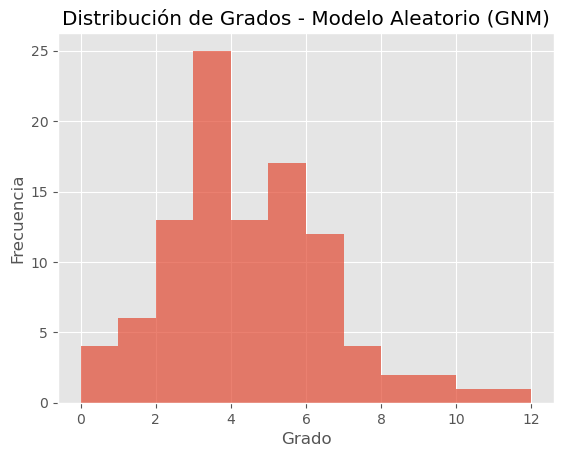

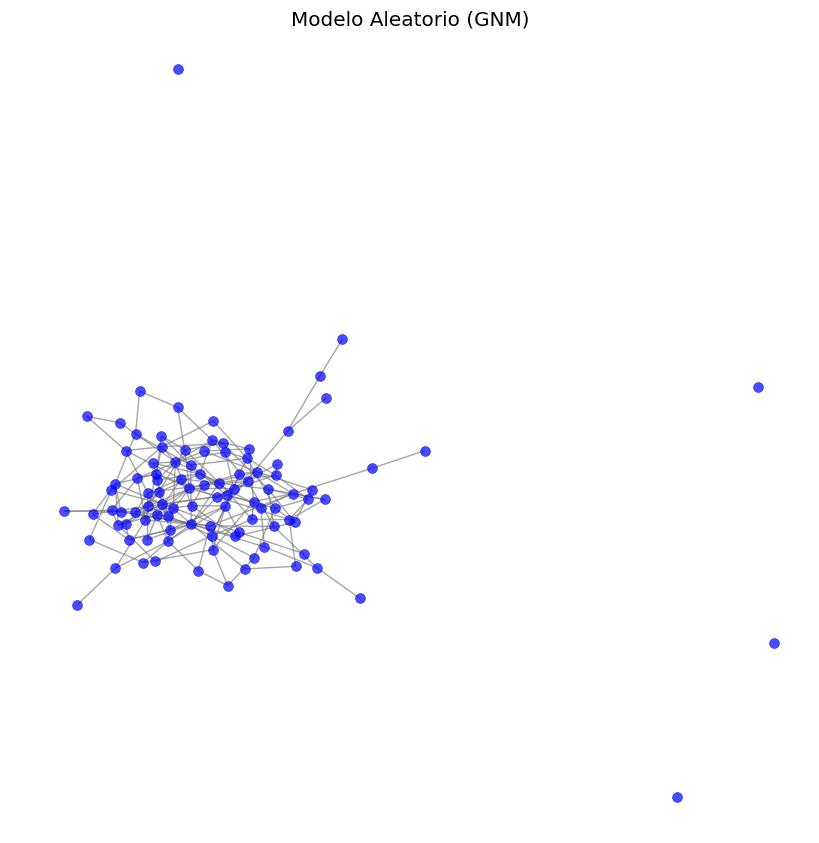

In [5]:
# Crear una red completamente aleatoria
n = 100  # Número de nodos
m = 200  # Número de enlaces totales (aleatorios)
G_random = nx.gnm_random_graph(n, m)

# Analizar y visualizar
analyze_and_plot(G_random, "Modelo Aleatorio (GNM)")


## 2. **Erdős-Rényi (ER)**

- **Estructura Inicial**: Red aleatoria generada con una probabilidad fija \( p \) para cada par de nodos.
- **Patrón de Grado**: Sigue una distribución **Poisson**.
- **Características Claves**:
  - Red completamente aleatoria sin reglas específicas.
  - Generación de enlaces entre nodos sin ningún patrón.
  - Fácil de implementar y entender.
- **Uso Común**: Redes teóricas básicas, análisis matemáticos de redes aleatorias.

Erdős-Rényi:
- Número de nodos: 100
- Número de enlaces: 248
- Grado promedio: 4.96
- Clustering promedio: 0.0569
- Componentes conectadas: 1


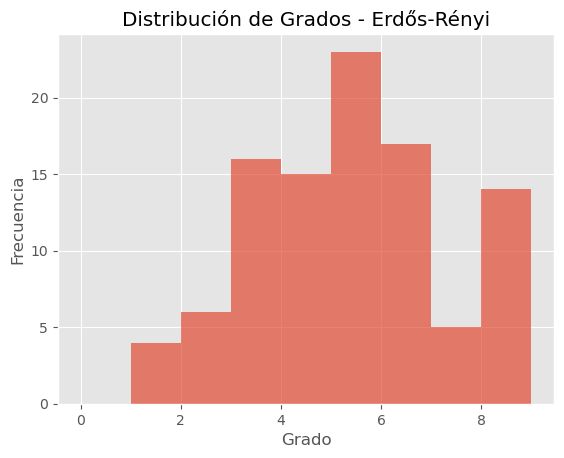

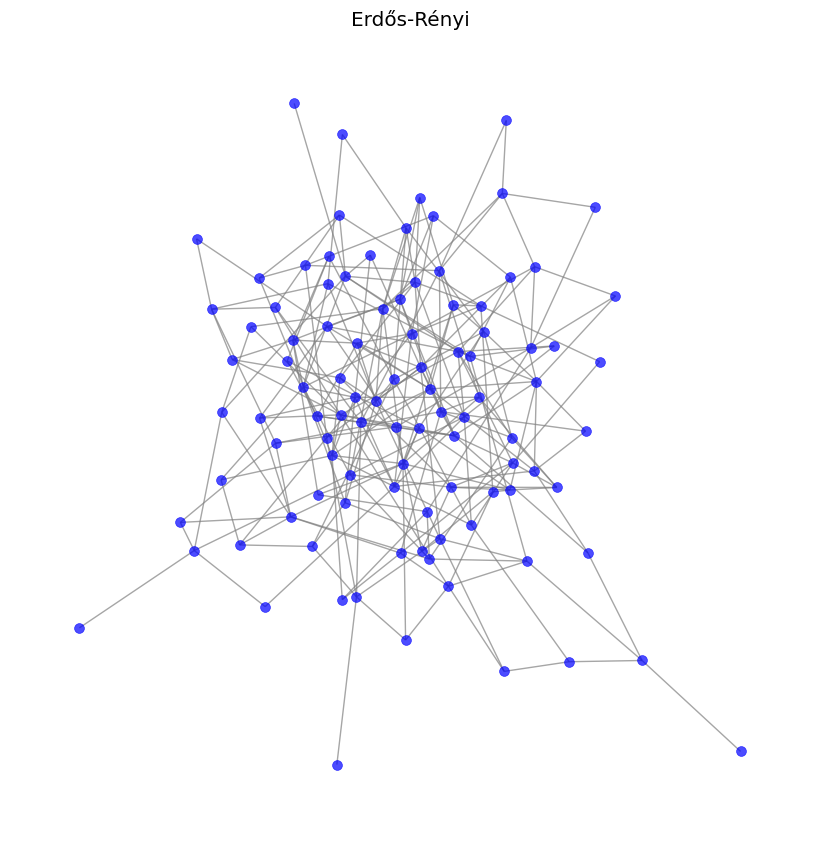

In [6]:
# Crear una red de Erdős-Rényi
n = 100  # Número de nodos
p = 0.05  # Probabilidad de conexión
G_er = nx.erdos_renyi_graph(n, p)

# Analizar y visualizar
analyze_and_plot(G_er, "Erdős-Rényi")


## 3. **Watts-Strogatz (WS)** 

- **Estructura Inicial**: Red regular (por ejemplo, anillo) con algunos enlaces aleatorios introducidos.
- **Patrón de Grado**: Patrón de grado **intermedio** entre regular y aleatorio.
- **Características Claves**:
  - **Propiedad de pequeño mundo**: Alta agrupación local y distancias cortas entre nodos.
  - Transición de una red regular a una red con conexiones aleatorias.
- **Uso Común**: Redes sociales, sistemas neuronales, fenómenos donde se necesitan distancias cortas entre nodos pero con alta cohesión local.


Watts-Strogatz:
- Número de nodos: 100
- Número de enlaces: 200
- Grado promedio: 4.00
- Clustering promedio: 0.3927
- Componentes conectadas: 1


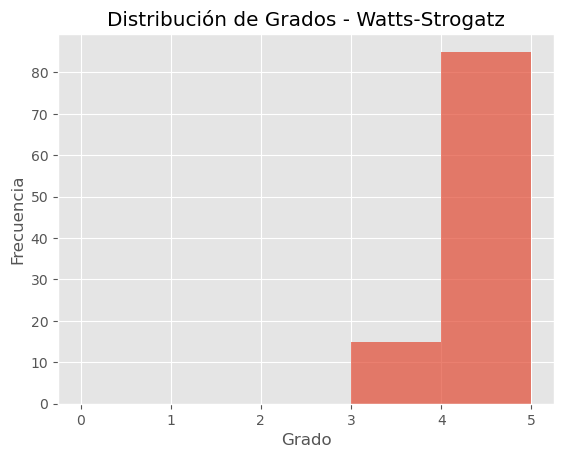

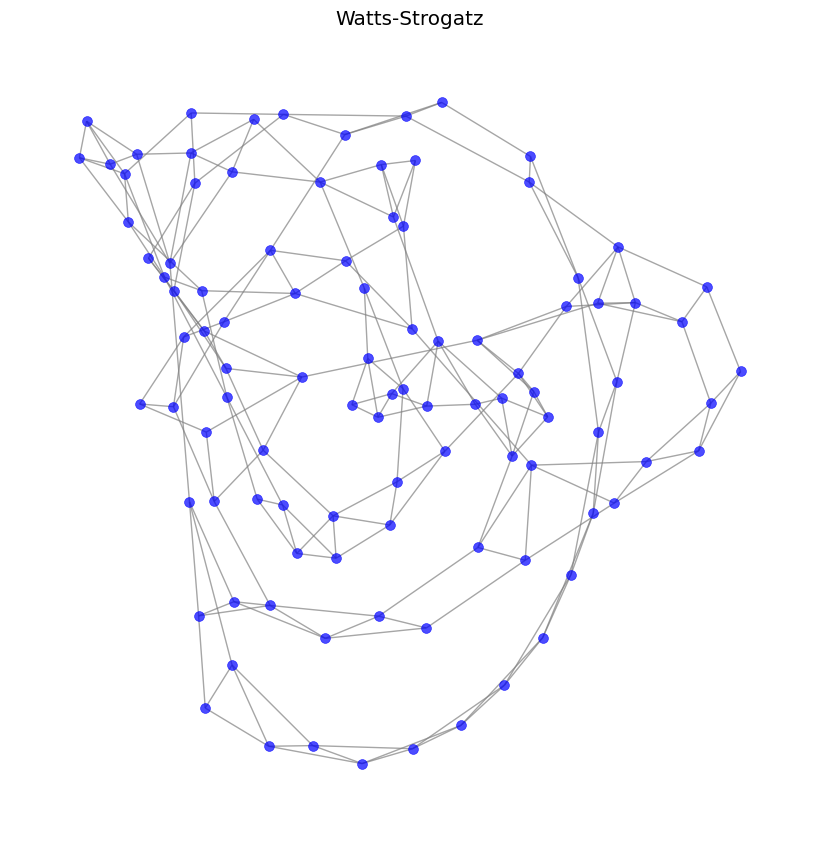

In [7]:
# Crear una red de Watts-Strogatz
k = 4  # Grado promedio inicial
p = 0.1  # Probabilidad de reconexión
G_ws = nx.watts_strogatz_graph(n, k, p)

# Analizar y visualizar
analyze_and_plot(G_ws, "Watts-Strogatz")

## 4. **Barabási-Albert (BA)** - **Modelo más complejo**

- **Estructura Inicial**: Crecimiento **preferencial**, donde nuevos nodos se conectan más fácilmente a nodos con muchos enlaces.
- **Patrón de Grado**: Sigue una **ley de potencias**, creando nodos altamente conectados (hubs).
- **Características Claves**: Red **libre de escala**, con una distribución de enlaces que favorece a los nodos con más conexiones.
- **Uso Común**: Internet, redes de colaboración científica, y redes con hubs influyentes.

### Mecánica:
1. **Inicio**: Comienza con un pequeño número de nodos.
2. **Crecimiento**: Se añaden nuevos nodos, cada uno con \(m\) enlaces a nodos existentes.
3. **Preferential Attachment**: Los nodos con más enlaces tienen mayor probabilidad de recibir nuevos enlaces, formando hubs.
4. **Iteraciones**: Se repite hasta alcanzar el número deseado de nodos.

### Importancia de \( m \): 
Controla la **densidad** de la red, afectando la dispersión y el tamaño de los hubs

Barabási-Albert:
- Número de nodos: 100
- Número de enlaces: 291
- Grado promedio: 5.82
- Clustering promedio: 0.1803
- Componentes conectadas: 1


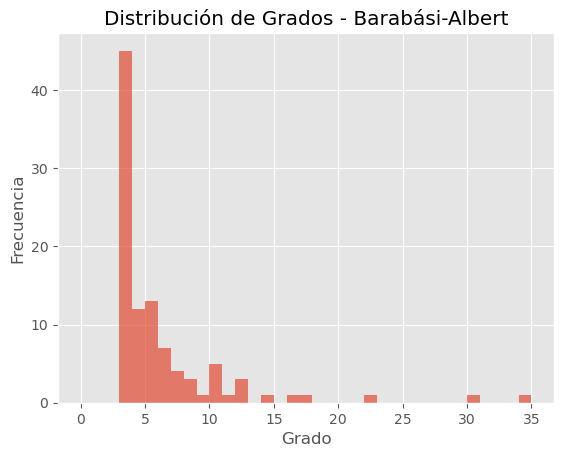

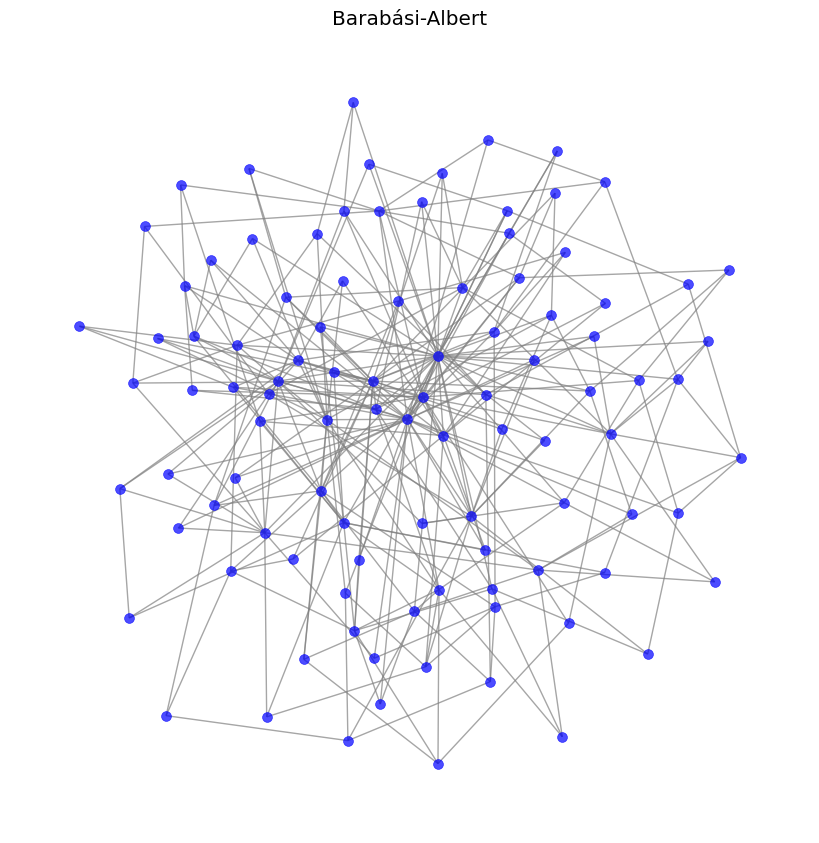

In [10]:
# Crear una red de Barabási-Albert
m = 3  # Número de enlaces que un nodo nuevo crea
G_ba = nx.barabasi_albert_graph(n, m)

# Analizar y visualizar
analyze_and_plot(G_ba, "Barabási-Albert")

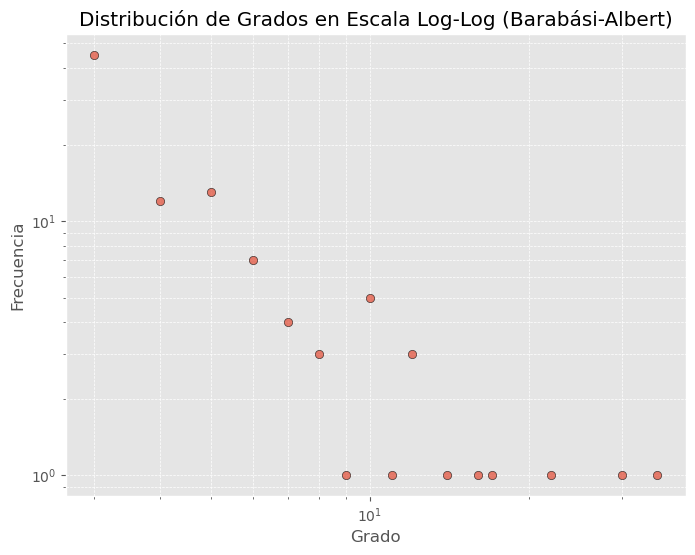

In [11]:
# Obtener los grados de los nodos
degrees = [degree for _, degree in G_ba.degree()]

# Crear el gráfico log-log
plt.figure(figsize=(8, 6))
degree_counts = np.bincount(degrees)
degree_values = np.arange(len(degree_counts))
plt.scatter(degree_values[degree_counts > 0], degree_counts[degree_counts > 0], alpha=0.7, edgecolor='k')

# Configurar escala log-log
plt.xscale('log')
plt.yscale('log')
plt.title("Distribución de Grados en Escala Log-Log (Barabási-Albert)")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## 5. Comparación de modelos de generación de redes


| **Modelo**           | **Estructura Inicial**      | **Patrón de Grado**    | **Características Claves**                                            | **Uso Común**                              |
|-----------------------|-----------------------------|------------------------|----------------------------------------------------------------------|--------------------------------------------|
| **Modelo Aleatorio (GNM)**| Aleatorio con número fijo de enlaces | Varía                 | Creación de enlaces aleatorios con un número fijo de conexiones.      | Modelos básicos de redes aleatorias       |
| **Erdős-Rényi (ER)**  | Aleatorio (probabilidad fija) | Poisson               | Red aleatoria sin reglas específicas de conexión.                    | Redes teóricas básicas                    |
| **Watts-Strogatz (WS)**| Regular con aleatoriedad    | Intermedio            | Alta cohesión local, pequeño mundo.                                    | Redes sociales, sistemas neuronales       |
| **Barabási-Albert (BA)**| Crecimiento preferencial   | Ley de potencias      | Hubs con muchos enlaces, red libre de escala.                          | Internet, redes de colaboración           |

In [15]:
# Crear un DataFrame vacío para almacenar los resultados
results_df = pd.DataFrame(columns=["Modelo", "Coeficiente de Clustering", "Componentes Conectadas"])

# Comparar los coeficientes de clustering y el número de componentes conectadas
new_data = [
    {"Modelo": "Erdős-Rényi", "Coeficiente de Clustering": nx.average_clustering(G_er), "Componentes Conectadas": nx.number_connected_components(G_er)},
    {"Modelo": "Watts-Strogatz", "Coeficiente de Clustering": nx.average_clustering(G_ws), "Componentes Conectadas": nx.number_connected_components(G_ws)},
    {"Modelo": "Barabási-Albert", "Coeficiente de Clustering": nx.average_clustering(G_ba), "Componentes Conectadas": nx.number_connected_components(G_ba)},
    {"Modelo": "Modelo Aleatorio", "Coeficiente de Clustering": nx.average_clustering(G_random), "Componentes Conectadas": nx.number_connected_components(G_random)}
]

# Concatenar las nuevas filas al DataFrame
new_rows = pd.DataFrame(new_data)
results_df = pd.concat([results_df, new_rows], ignore_index=True)

# Mostrar el DataFrame con los resultados
print(results_df)


             Modelo  Coeficiente de Clustering Componentes Conectadas
0       Erdős-Rényi                   0.056865                      1
1    Watts-Strogatz                   0.392667                      1
2   Barabási-Albert                   0.180286                      1
3  Modelo Aleatorio                   0.027082                      5


C:\Users\csolis\AppData\Local\Temp\ipykernel_18728\3493847025.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_rows], ignore_index=True)


----------------------------------------

----------------------------

### Actividad Evaluada: **Análisis Comparativo de Modelos de Redes**

**Objetivo**: comprender, implementar y analizar las propiedades de los modelos de redes de **Erdős-Rényi**, **Watts-Strogatz**, **Barabási-Albert** y el **Modelo Aleatorio (GNM)** .

---

### **Instrucciones**

1. **Descarga y Ejecución del Notebook Base**:
   - Basarse en el notebook base 
   - Crear un nuevo notebook solo con el desarrollo de esta tarea

2. **Análisis y Comparaciones**:
   - Responde las preguntas especificas

3. **Entrega**:
   - Subir el notebook con la tarea desarrollado en formato .html a canvas

---

### **Tareas y Preguntas**

#### **1. Modelo de Erdős-Rényi**
- **Tarea**: Cambia los parámetros \( p \) (probabilidad de conexión) y \( n \) (número de nodos) para generar redes con diferentes características.
  - Genera redes con \( p = 0.01 \), \( p = 0.1 \), y \( p = 0.5 \), manteniendo \( n = 100 \).
- **Pregunta**: ¿Cómo afecta \( p \) a la conectividad global y al clustering promedio de la red? Explica tus observaciones basándote en las métricas calculadas.

---

#### **2. Modelo de Watts-Strogatz**
- **Tarea**: Genera redes con diferentes probabilidades de reconexión (\ p \) manteniendo \( n = 100 \) y \( k = 4 \):
  - \( p = 0 \), \( p = 0.1 \), y \( p = 1.0 \).
- **Pregunta**: ¿Qué sucede con el coeficiente de clustering y el camino promedio a medida que \( p \) aumenta? Relaciona esto con las propiedades de "mundo pequeño".

---

#### **3. Modelo de Barabási-Albert**
- **Tarea**: Cambia el parámetro \( m \) (enlaces por nodo nuevo) y analiza su impacto:
  - Genera redes con \( m = 2 \), \( m = 4 \), y \( m = 6 \), manteniendo \( n = 100 \).
  - Genera el gráfico log-log para la distribución de grados de cada red.
- **Pregunta**: ¿Qué observas sobre la formación de hubs y la forma de la distribución de grados a medida que varía \( m \)?

---

#### **4. Modelo Aleatorio (GNM)**
- **Tarea**: Genera redes con diferentes números de enlaces (\( m \)) manteniendo \( n = 100 \):
  - \( m = 100 \), \( m = 200 \), y \( m = 400 \).
- **Pregunta**: ¿Cómo se comporta el coeficiente de clustering y el número de componentes conectadas a medida que aumenta \( m \)?

---

#### **5. Comparaciones Globales**
- **Tarea**: Completa la celda que compara las métricas clave (clustering promedio, número de componentes conectadas, etc.) para los cuatro modelos.
- **Pregunta Final**:
  - ¿Qué diferencias fundamentales observas entre los cuatro modelos?
  - Si quisieras modelar una red social real, ¿qué modelo usarías y por qué?

---